In [1]:

# -*- coding:utf-8 -*-
import pandas as pd
import sys
import glob
import os

problem = pd.read_csv("src/SolarPV_Elec_Problem.csv", index_col=0, parse_dates=True)
weather = pd.read_csv("src/AVG_weather_15min.csv", index_col=1, parse_dates=True)



def get_average_table(weather_frame: pd.DataFrame, period_min: int):
    # 풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
    # location, datetime, temperature, percipitation, wind_degree, wind_speed, air_pressure, sea_level_pressure, humidity, solar_radiation, solr_intensity
    weather_frame.columns = ["datetime", "temperature", "percipitation", "wind_degree", "wind_speed", "air_pressure",
                             "sea_level_pressure", "humidity", "solar_radiation", "solar_intensity"]
    temp = pd.DataFrame()
    # temp['datetime'] = weather_frame['datetime'].resample(f'{str(period_min)}T')
    temp['temperature'] = weather_frame['temperature'].resample(f'{str(period_min)}T').mean()
    temp['percipitation'] = weather_frame['percipitation'].resample(f'{str(period_min)}T').mean().diff()
    temp['wind_degree'] = weather_frame['wind_degree'].resample(f'{str(period_min)}T').mean()
    temp['wind_speed'] = weather_frame['wind_speed'].resample(f'{str(period_min)}T').mean()
    temp['air_pressure'] = weather_frame['air_pressure'].resample(f'{str(period_min)}T').mean()
    temp['sea_level_pressure'] = weather_frame['sea_level_pressure'].resample(f'{str(period_min)}T').mean()
    temp['humidity'] = weather_frame['humidity'].resample(f'{str(period_min)}T').mean()
    temp['solar_radiation'] = weather_frame['solar_radiation'].resample(f'{str(period_min)}T').mean().diff()
    temp['solar_intensity'] = weather_frame['solar_intensity'].resample(f'{str(period_min)}T').mean().diff()
    print(temp.head(5))
    return temp


def df_to_csv(df: pd.DataFrame, filename: str):
    df.to_csv(f'out/{filename}', sep=',', na_rep='NaN')


def make_avg_file():
    weather_file_list = glob.glob("src/weather/*.csv")
    for f in weather_file_list:
        print(f)
        target = pd.read_csv(f, index_col=1, parse_dates=True)
        k = get_average_table(target, 15)
        df_to_csv(k, f"weather_avg_15min/diff_{os.path.basename(f)}")


def concat_csv_vertical(l, index_col: int):
    return pd.concat((pd.read_csv(f, index_col=index_col) for f in l))


def concat_dataset(a,b):
    return pd.concat([a, b], axis=1)


make_avg_file()
processed_file_list = glob.glob("out/weather_avg_15min/diff*.csv")
w = concat_csv_vertical(processed_file_list, 0)
w.sort_index(inplace=True)
size = len(w.index)
print(size)
df_to_csv(concat_csv_vertical(processed_file_list, 0), "dataset1.csv")
print(concat_csv_vertical(processed_file_list, 0))
s = pd.concat([problem, w], axis=1)

s['date'] = pd.DatetimeIndex(s.index).day
s['month'] = pd.DatetimeIndex(s.index).month
s['hour'] = pd.DatetimeIndex(s.index).hour

src/weather/SURFACE_ASOS_131_MI_2020-01_2020-01_2020.csv
                     temperature  percipitation  wind_degree  wind_speed  \
일시                                                                         
2020-01-01 00:00:00    -6.540000            NaN   208.973333    0.926667   
2020-01-01 00:15:00    -6.613333            0.0   204.833333    1.146667   
2020-01-01 00:30:00    -6.500000            0.0   222.320000    0.833333   
2020-01-01 00:45:00    -6.593333            0.0   209.500000    1.360000   
2020-01-01 01:00:00    -6.540000            0.0   183.720000    1.046667   

                     air_pressure  sea_level_pressure   humidity  \
일시                                                                 
2020-01-01 00:00:00   1027.766667         1035.266667  65.980000   
2020-01-01 00:15:00   1027.560000         1035.060000  65.733333   
2020-01-01 00:30:00   1027.400000         1034.900000  65.266667   
2020-01-01 00:45:00   1027.340000         1034.840000  64.413333   
20

In [46]:
s = s.fillna(0)
s.head(15)


temp = s

In [47]:
temp = temp.fillna(0)

temp.to_csv('dataset_diff.csv')


In [5]:
temp.head(10)

,result,temperature,percipitation,wind_degree,wind_speed,air_pressure,sea_level_pressure,humidity,solar_radiation,solar_intensity
일시,,,,,,,,,,
2019-07-01 00:00:00,0.0,23.273333,0.0,216.073333,1.193333,997.380000,1003.880000,84.453333,0.0,0.0
2019-07-01 00:15:00,0.0,23.200000,0.0,225.486667,1.306667,997.266667,1003.766667,84.853333,0.0,0.0
2019-07-01 00:30:00,0.0,23.200000,0.0,223.140000,0.646667,997.200000,1003.700000,85.280000,0.0,0.0
2019-07-01 00:45:00,0.0,23.200000,0.0,252.066667,1.053333,997.200000,1003.700000,85.560000,0.0,0.0
2019-07-01 01:00:00,0.0,23.200000,0.0,230.933333,0.973333,997.133333,1003.633333,85.740000,0.0,0.0
2019-07-01 01:15:00,0.0,23.140000,0.0,218.113333,0.900000,997.026667,1003.526667,85.893333,0.0,0.0
2019-07-01 01:30:00,0.0,23.133333,0.0,255.533333,1.366667,997.160000,1003.660000,86.080000,0.0,0.0
2019-07-01 01:45:00,0.0,23.133333,0.0,251.833333,0.940000,997.080000,1003.580000,86.186667,0.0,0.0
2019-07-01 02:00:00,0.0,23.100000,0.0,248.373333,1.360000,996.966667,1003.466667,86.146667,0.0,0.0


In [6]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(rc={'figure.figsize':(30,10)})


In [2]:
avg_df = pd.read_csv("dataset_diff.csv")

In [16]:
corr = avg_df.corr()

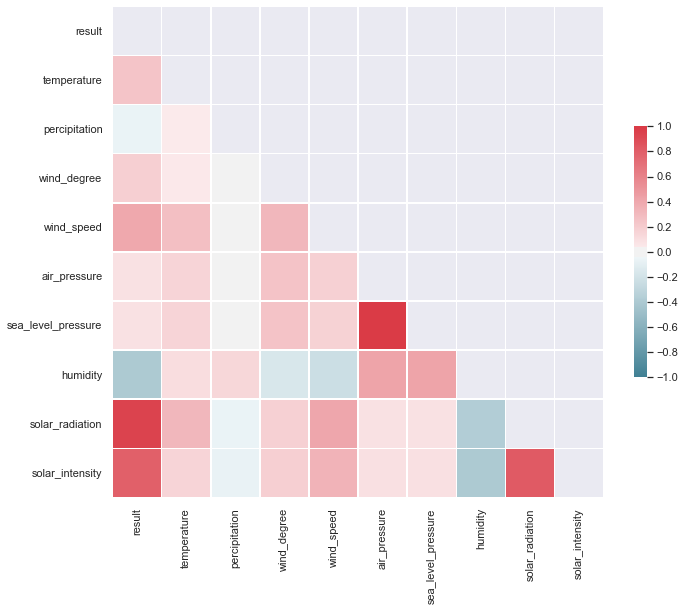

In [17]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
test = avg_df.solar_intensity.diff()

In [19]:
period_min = 15
weather = pd.read_csv("utils/generator/dataset/src/AVG_weather_15min.csv", index_col=1, parse_dates=True)
test1 = weather['일조(Sec)'].resample(f'{str(period_min)}T').mean().diff()



FileNotFoundError: [Errno 2] File b'utils/generator/dataset/src/AVG_weather_15min.csv' does not exist: b'utils/generator/dataset/src/AVG_weather_15min.csv'

In [18]:
corr['result']


result                1.000000
temperature           0.247155
percipitation        -0.054989
wind_degree           0.193411
wind_speed            0.403046
air_pressure          0.089523
sea_level_pressure    0.089101
humidity             -0.394002
solar_radiation       0.948446
solar_intensity       0.795518
Name: result, dtype: float64

In [48]:
df = pd.read_csv("dataset_diff.csv")

df.rename(columns={'일시':'datetime'}, inplace=True)
df.head(5)

,datetime,result,temperature,percipitation,wind_degree,wind_speed,air_pressure,sea_level_pressure,humidity,solar_radiation,solar_intensity,date,month,hour
0,2019-07-01 00:00:00,0.0,23.273333,0.0,216.073333,1.193333,997.380000,1003.880000,84.453333,0.0,0.0,1,7,0
1,2019-07-01 00:15:00,0.0,23.200000,0.0,225.486667,1.306667,997.266667,1003.766667,84.853333,0.0,0.0,1,7,0
2,2019-07-01 00:30:00,0.0,23.200000,0.0,223.140000,0.646667,997.200000,1003.700000,85.280000,0.0,0.0,1,7,0
3,2019-07-01 00:45:00,0.0,23.200000,0.0,252.066667,1.053333,997.200000,1003.700000,85.560000,0.0,0.0,1,7,0
4,2019-07-01 01:00:00,0.0,23.200000,0.0,230.933333,0.973333,997.133333,1003.633333,85.740000,0.0,0.0,1,7,1


In [49]:
type(pd.to_datetime(df.datetime[1], infer_datetime_format=True)) 
pd.to_datetime(df.datetime[1], infer_datetime_format=True)



Timestamp('2019-07-01 00:15:00')

In [50]:
df.datetime = pd.to_datetime(df.datetime, infer_datetime_format=True)

In [51]:
import numpy as np
df["difference"] = df["datetime"].sub(pd.to_datetime("2019-01-01", infer_datetime_format=True), axis=0)/ np.timedelta64(1, 'D')

In [52]:
# df.loc[df.difference >= 365] = df.loc[df.difference >= 365].difference - 365

for x in range(len(df.difference)):
    if df.difference.iloc[x] > 365:
        df.difference.iloc[x] -= 365 

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [53]:
df.to_csv("datefrom1st.csv")